In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, plot_roc_curve, roc_auc_score
from sklearn.svm import SVC


In [3]:
columns = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area',
           'Smoothness', 'Compactness', 'Concavity', 'Concave points',
           'Symmetry', 'Fractal dimension']

df = pd.read_csv('wdbc.data', index_col=0, usecols=range(12), names=columns)

X = df.drop('Diagnosis', axis=1).values
y = df['Diagnosis'].values
X = StandardScaler().fit_transform(X)

diagnoses = ['B', 'M']
encode = {diagnoses[i]: i for i in range(len(diagnoses))}

y = [encode[val] for val in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)


In [4]:
len(y)

569

In [5]:
sum(y)

212

In [92]:
rf_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_leaf_nodes': [5,10,20,None],
}

gb_params = {
    'learning_rate': [0.75, 0.1, 0.15],
    'n_estimators': [50, 100,150,200,300,400],
    'max_depth': [3,7,10,15],
    'subsample': [0.7,0.8,0.9,1.0]
}

dt_params = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 3, 4, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

svm_params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'C': [0.8, 0.9, 1, 1.1, 1.2],
    'shrinking': [True, False]
}

log_params = {
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2'],
    'C': [10, 1.0, 0.1, 0.01],
}



In [93]:
rf = RandomizedSearchCV(RandomForestClassifier(random_state=1), rf_params, n_jobs=-1, n_iter = 100, random_state=1)
gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=1), gb_params, n_jobs=-1, n_iter = 100, random_state=1)
dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), dt_params, n_jobs=-1, n_iter = 100, random_state=1)
svm = RandomizedSearchCV(SVC(probability=True), svm_params, n_jobs=-1, n_iter = 5, random_state=1)
log = RandomizedSearchCV(LogisticRegression(random_state=1), log_params, n_jobs=-1, n_iter = 100, random_state=1)

names = ['Random forest', 'Gradient boosting', 'Decision tree', 'Support vector machine', 'Logistic regression']
models = [rf, gb, dt, svm, log]
model_preds = []

for model in models:
    model.fit(X_train, y_train)
    model_preds.append(model.predict(X_test))


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:3

In [94]:
models[1].best_params_

{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

-----------------------------------------------------
ACCURACY COMPARISON
-----------------------------------------------------


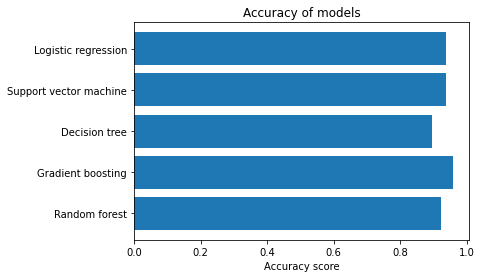

Accuracy of Random forest: 0.9230769230769231 

Accuracy of Gradient boosting: 0.958041958041958 

Accuracy of Decision tree: 0.8951048951048951 

Accuracy of Support vector machine: 0.9370629370629371 

Accuracy of Logistic regression: 0.9370629370629371 



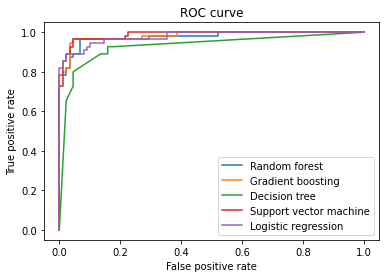

-----------------------------------------------------
ANALYSIS OF RANDOM FOREST
-----------------------------------------------------


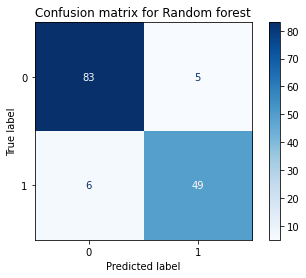

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.89      0.91      0.90        54

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

-----------------------------------------------------
ANALYSIS OF GRADIENT BOOSTING
-----------------------------------------------------


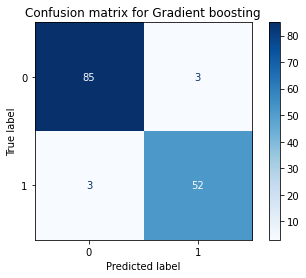

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        88
           1       0.95      0.95      0.95        55

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

-----------------------------------------------------
ANALYSIS OF DECISION TREE
-----------------------------------------------------


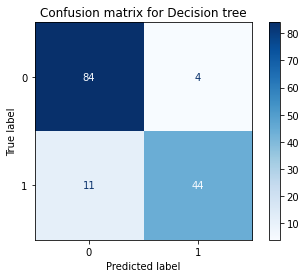

              precision    recall  f1-score   support

           0       0.95      0.88      0.92        95
           1       0.80      0.92      0.85        48

    accuracy                           0.90       143
   macro avg       0.88      0.90      0.89       143
weighted avg       0.90      0.90      0.90       143

-----------------------------------------------------
ANALYSIS OF SUPPORT VECTOR MACHINE
-----------------------------------------------------


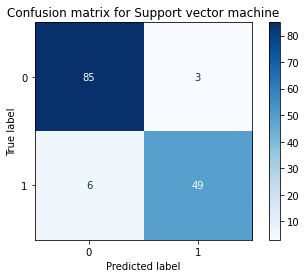

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        91
           1       0.89      0.94      0.92        52

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

-----------------------------------------------------
ANALYSIS OF LOGISTIC REGRESSION
-----------------------------------------------------


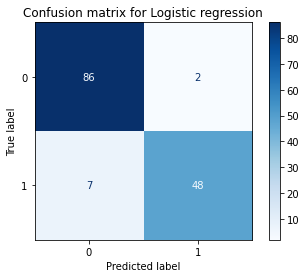

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        93
           1       0.87      0.96      0.91        50

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [95]:
# Results
def print_f(msg):
    bar = '-----------------------------------------------------'
    print(f'{bar}\n{msg.upper()}\n{bar}')

print_f('accuracy comparison')
fig, ax = plt.subplots()
ax.set_title('Accuracy of models') 
ax.set_xlabel('Accuracy score') 
plt.barh(names, [accuracy_score(y_test, y_pred) for y_pred in model_preds])
plt.show()

for i, name in enumerate(names):
    print(f'Accuracy of {name}:', accuracy_score(y_test, model_preds[i]), '\n')

for model in models:
    yproba = model.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_curve(y_test, yproba)
    plt.plot(fpr,tpr,label=str(auc))

plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(names)
plt.show()

# fpr, tpr, thresh = metrics.roc_curve(label, pred)

# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
# fpr, tpr, thresh = metrics.roc_curve(label, pred)
# auc = metrics.roc_auc_score(label, pred)
# plt.plot(fpr,tpr,label="data 2, auc="+str(auc))


for i, (model, name) in enumerate(zip(models, names)):
    print_f('Analysis of ' + name)
    # print_f(name + ' analysis')
    # y_prob = model.predict_proba(X_test)[:, 1]
    # roc = RocCurveDisplay.from_predictions(y_test, y_prob, pos_label='M');
    # roc.ax_.set_title('ROC curve for ' + name)
    # plt.show()
    conf = ConfusionMatrixDisplay.from_predictions(y_test, model_preds[i], cmap='Blues');
    conf.ax_.set_title('Confusion matrix for ' + name)
    plt.show()
    print(classification_report(model_preds[i], y_test))


